# Alex Teboul
# Method: Sentiment Analysis

##Part 1: Explore how the body of text in a yelp review and yelp ratings are related. 
* Can we determine sentiment from text and compare it to ratings? Investigate how well an existing sentiment analysis package like textblob works with yelp review text.

##Part 2: Explore model building and sentiment analysis.
* Can a sentiment model built on an entirely different dataset still work with our yelp data? Specifically, can we train a model on the classic IMDB movie review dataset, and use the model to analyze sentiment on yelp reviews effectively.


## Table of Contents
Part 1: Yelp Reviews & Sentiment Analysis with TextBlob
*  1. Get the data
*  2. Select just the text and review_stars data
*  3. Add a column for highlow, where high is 4 or 5 stars and low is 1,2, or 3 stars
*  4. Clean the text column
*  5. Analyze sentiment using the textblob package
*  6. Get high and low dataframes, and visualize frequent words in a word cloud
*  7. Visualize sentiment scores vs. ratings and sentiment scores vs. highlow

Part 2: Train Model on classic IMDB movie review dataset, and use the model to analyze sentiment on yelp reviews.
* 1. Get IMDB dataset which contains movie reviews data and preprocess it
* 2. Using a standard sequential model, relu activations, adam optimizer, and a binary crossentropy loss function
* 3. With a batch size of 128 and 5 epochs, train the model
* 4. Display the results of training
* 5. Build an analyzer function to apply this outside model to our Yelp data
* 6. Visualize the new model's sentiment scores vs ratings
* 7. Test the model on some Yelp Reviews
* 8. Extra - Predictive ability check - Logistic Regression on High-Low Ratings


##Part 1: Yelp Reviews & Sentiment Analysis with TextBlob

### 1. Get the data

In [0]:
#Imports
import numpy as np
import pandas as pd

In [10]:
#Mount Google Drive to get files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
vegaspath = '/content/drive/My Drive/vegas_cleaned.csv'
#Alternative: if on local device use: vegaspath = 'vegas_cleaned.csv'
vegas_data = pd.read_csv(vegaspath)
vegas_data.head()

,text,date,review_stars,business_name,address,business_stars,is_open,attributes,categories,user_name,user_review_count,average_stars
0,"Like walking back in time, every Saturday morn...",2011-11-30 02:11:15,4.0,Pinball Hall Of Fame,1610 E Tropicana Ave,4.5,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Performing Arts, Amusement Parks, Museums, Arc...",Carol,866,4.16
1,Glad we caught it before leaving the Vegas sta...,2012-03-30 16:55:16,5.0,The Lion King,"Mandalay Bay Theatre, 3950 Las Vegas Blvd S",4.5,0,{'GoodForKids': 'True'},"Arts & Entertainment, Performing Arts",Carol,866,4.16
2,This is a really quaint place for the whole fa...,2016-11-21 19:55:31,4.0,Pinball Hall Of Fame,1610 E Tropicana Ave,4.5,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Performing Arts, Amusement Parks, Museums, Arc...",Jamie,169,4.52
3,Yes! As good as it gets in way of pinball mach...,2015-01-18 15:08:19,5.0,Pinball Hall Of Fame,1610 E Tropicana Ave,4.5,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Performing Arts, Amusement Parks, Museums, Arc...",Chelsi,19,4.10
4,My family and I have been to this show twice. ...,2013-10-28 19:50:54,5.0,Marriage Can Be Murder,301 Fremont St,4.0,1,{'GoodForKids': 'False'},"Performing Arts, Arts & Entertainment",Chelsi,19,4.10


In [12]:
vegas_data.shape

(37648, 12)

In [13]:
vegas_data.describe()

,review_stars,business_stars,is_open,user_review_count,average_stars
count,37648.000000,37648.000000,37648.000000,37648.000000,37648.000000
mean,4.023720,4.028806,0.872875,208.732974,3.790983
std,1.309937,0.650636,0.333117,443.668726,0.634756
min,1.000000,1.500000,0.000000,1.000000,1.000000
25%,3.000000,3.500000,1.000000,15.000000,3.500000
50%,5.000000,4.000000,1.000000,56.000000,3.820000
75%,5.000000,4.500000,1.000000,211.000000,4.150000
max,5.000000,5.000000,1.000000,12390.000000,5.000000


### 2. Select just the text and review_stars data

In [14]:
vegas = vegas_data[['text','review_stars']]
vegas.head()

,text,review_stars
0,"Like walking back in time, every Saturday morn...",4.0
1,Glad we caught it before leaving the Vegas sta...,5.0
2,This is a really quaint place for the whole fa...,4.0
3,Yes! As good as it gets in way of pinball mach...,5.0
4,My family and I have been to this show twice. ...,5.0


### 3. Add a column for highlow, where high is 4 or 5 stars and low is 1,2, or 3 stars

In [15]:
vegas['highlow'] = [1 if x >=4 else 0 for x in vegas['review_stars']] 
vegas.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,review_stars,highlow
0,"Like walking back in time, every Saturday morn...",4.0,1
1,Glad we caught it before leaving the Vegas sta...,5.0,1
2,This is a really quaint place for the whole fa...,4.0,1
3,Yes! As good as it gets in way of pinball mach...,5.0,1
4,My family and I have been to this show twice. ...,5.0,1


In [16]:
vegas.describe()

,review_stars,highlow
count,37648.000000,37648.000000
mean,4.023720,0.739482
std,1.309937,0.438923
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [17]:
#how many of each review stars
vegas.review_stars.value_counts()

5.0    20030
4.0     7810
3.0     3877
1.0     3398
2.0     2533
Name: review_stars, dtype: int64

In [18]:
vegas.highlow.value_counts()

1    27840
0     9808
Name: highlow, dtype: int64

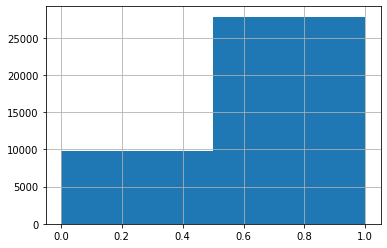

In [19]:
vegas.highlow.hist(bins=2)

### 4. Clean the text column

In [20]:
vegas["clean_text"] = vegas['text'].str.replace('[^\w\s]','')
vegas.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,review_stars,highlow,clean_text
0,"Like walking back in time, every Saturday morn...",4.0,1,Like walking back in time every Saturday morni...
1,Glad we caught it before leaving the Vegas sta...,5.0,1,Glad we caught it before leaving the Vegas sta...
2,This is a really quaint place for the whole fa...,4.0,1,This is a really quaint place for the whole fa...
3,Yes! As good as it gets in way of pinball mach...,5.0,1,Yes As good as it gets in way of pinball machi...
4,My family and I have been to this show twice. ...,5.0,1,My family and I have been to this show twice B...


In [21]:
vegas["clean_text"] = vegas['clean_text'].str.lower()
vegas["clean_text"] = vegas['clean_text'].str.replace('\n',' ')
vegas.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,review_stars,highlow,clean_text
0,"Like walking back in time, every Saturday morn...",4.0,1,like walking back in time every saturday morni...
1,Glad we caught it before leaving the Vegas sta...,5.0,1,glad we caught it before leaving the vegas sta...
2,This is a really quaint place for the whole fa...,4.0,1,this is a really quaint place for the whole fa...
3,Yes! As good as it gets in way of pinball mach...,5.0,1,yes as good as it gets in way of pinball machi...
4,My family and I have been to this show twice. ...,5.0,1,my family and i have been to this show twice b...


### 5. Analyze sentiment using the textblob package

* Sentiment is given as a score between -1 and +1. The more negative, the greater the probability that the sentiment was poor - The more positive, the more likely it was a good sentiment in the text.
* Use of this package was to establish a baseline in analyzing sentiment.

In [0]:
from textblob import TextBlob

In [23]:
vegas["textblob_sentiment"] = vegas['clean_text'].apply(lambda review: TextBlob(review).sentiment.polarity)
vegas.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,review_stars,highlow,clean_text,textblob_sentiment
0,"Like walking back in time, every Saturday morn...",4.0,1,like walking back in time every saturday morni...,0.061458
1,Glad we caught it before leaving the Vegas sta...,5.0,1,glad we caught it before leaving the vegas sta...,0.292857
2,This is a really quaint place for the whole fa...,4.0,1,this is a really quaint place for the whole fa...,0.177941
3,Yes! As good as it gets in way of pinball mach...,5.0,1,yes as good as it gets in way of pinball machi...,0.448889
4,My family and I have been to this show twice. ...,5.0,1,my family and i have been to this show twice b...,0.290747


### 6. Get high and low dataframes, and visualize frequent words in a word cloud

In [24]:
#vegas_high (4 and 5 star ratings)
vegas_high = vegas[vegas['highlow'] == 1]
vegas_high = vegas_high.sort_values(by=['textblob_sentiment'], ascending=False)
vegas_high.head()

,text,review_stars,highlow,clean_text,textblob_sentiment
27994,I'm speechless!! Can't describe how wonderful ...,5.0,1,im speechless cant describe how wonderful it i...,1.0
19802,Absolutely awesome show!,5.0,1,absolutely awesome show,1.0
1792,Best place in Vegas. Cannot visit the city wit...,5.0,1,best place in vegas cannot visit the city with...,1.0
23409,"This studio is wonderful, my daughter loves Ms...",5.0,1,this studio is wonderful my daughter loves ms ...,1.0
84,This place is a museum of pinball machines it'...,5.0,1,this place is a museum of pinball machines its...,1.0


In [25]:
#vegas_low (1,2,3 star ratings)
vegas_low = vegas[vegas['highlow'] == 0]
vegas_low = vegas_low.sort_values(by=['textblob_sentiment'])
vegas_low.head()

,text,review_stars,highlow,clean_text,textblob_sentiment
30149,Show got canceled and the service was horrible...,1.0,0,show got canceled and the service was horrible...,-1.0
20341,It was the worst show we have ever seen; there...,1.0,0,it was the worst show we have ever seen there ...,-1.0
11794,Prob one of the worst shows I have seen in Veg...,1.0,0,prob one of the worst shows i have seen in veg...,-1.0
18124,"This show don't deserve any review, this guy w...",1.0,0,this show dont deserve any review this guy was...,-1.0
20790,"Now you see the douche bag, and with one puff ...",1.0,0,now you see the douche bag and with one puff o...,-1.0


In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

#### Low Ratings Word Cloud (1, 2, 3 Stars)

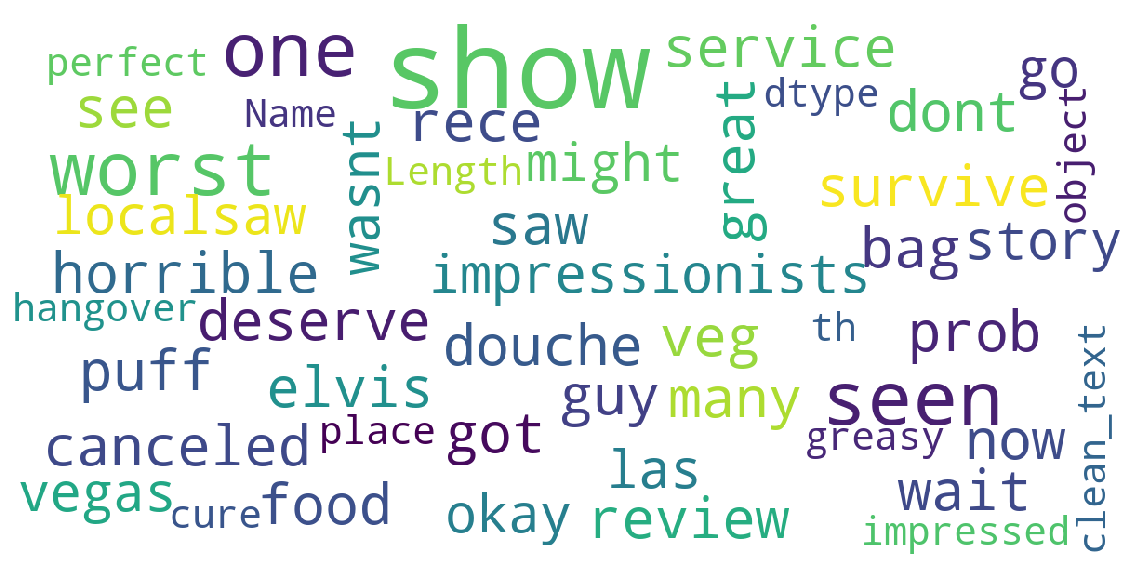

In [27]:
# print wordcloud
show_wordcloud(vegas_low["clean_text"])

#### High Ratings Word Cloud (4, 5 Stars)

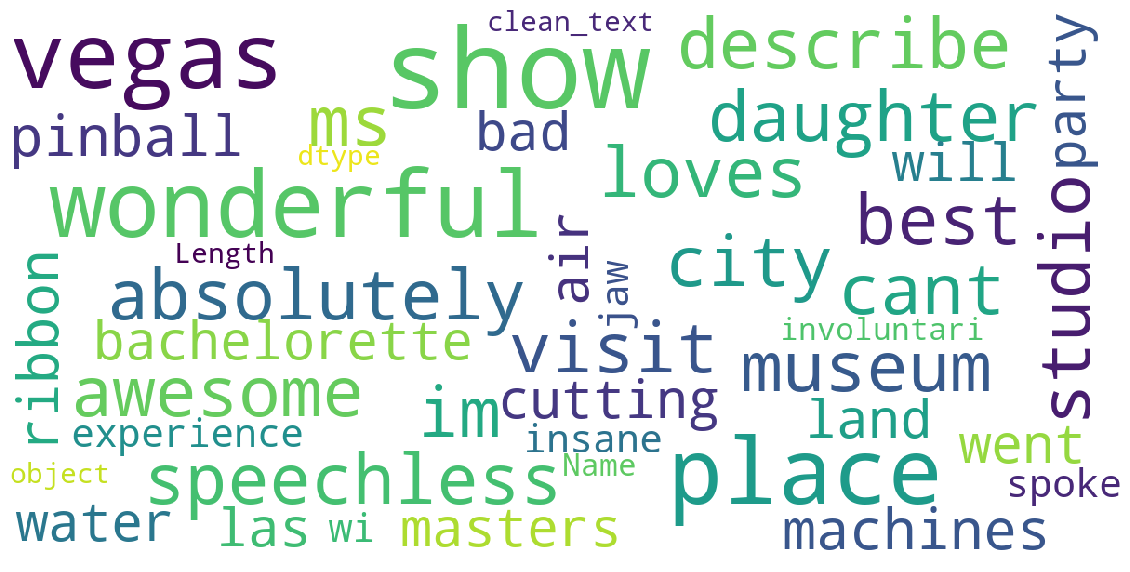

In [28]:
# print wordcloud
show_wordcloud(vegas_high["clean_text"])

### 7. Visualize sentiment scores vs. ratings and sentiment scores vs. highlow

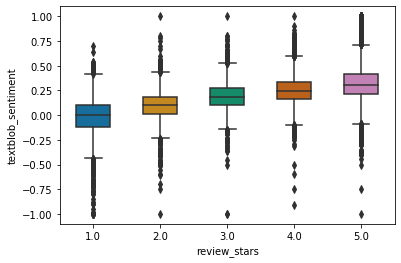

In [29]:
import seaborn as sns
# plot boxplot with seaborn
bplot=sns.boxplot(y='textblob_sentiment', x='review_stars', 
                 data=vegas, 
                 width=0.5,
                 palette="colorblind")


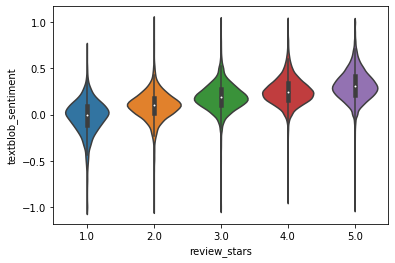

In [30]:
#As Violin Plot
ax = sns.violinplot(x="review_stars", y="textblob_sentiment", data=vegas)

In [31]:
#check correlation
vegas['review_stars'].corr(vegas['textblob_sentiment'])

0.5464460060630797

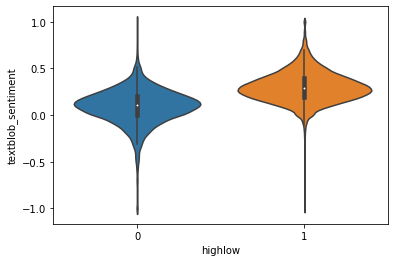

In [32]:
#highlow boxplot
ax2 = sns.violinplot(x="highlow", y="textblob_sentiment", data=vegas)

In [33]:
vegas['highlow'].corr(vegas['textblob_sentiment'])

0.4769192764083251

*  At this stage, we can see that textblob_sentiment and ratings are not that strongly correlated when the text has been minimally processed.

##Part 2: Train Model on classic IMDB movie review dataset, and use the model to analyze sentiment on yelp reviews.

###1. Get IMDB dataset which contains movie reviews data and preprocess it

In [34]:
#Get the IMDB Dataset, format data appropriate to input into model
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)
#a total of 88000 words are contained in the dictionary and 
imdb.get_word_index()
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
from keras.preprocessing import sequence
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)
print(x_train.shape, x_test.shape)

Using TensorFlow backend.


1646592/1641221 [==============================] - 1s 1us/step
(25000, 500) (25000, 500)


In [35]:
import pandas as pd
dfff = pd.DataFrame(x_train)
dfff.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,22,21,134,476,26,480,5,144,30,5535,18,51,36,28,224,92,25,104,4,226,65,16,38,1334,88,12,16,283,5,16,4472,113,103,32,15,16,5345,19,178,32
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,152,491,18,2,32,7464,1212,14,9,6,371,78,22,625,64,1382,9,8,168,145,23,4,1690,15,16,4,1355,5,28,6,52,154,462,33,89,78,285,16,145,95
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23,22,12,272,40,57,31,11,4,22,47,6,2307,51,9,170,23,595,116,595,1352,13,191,79,638,89,2,14,9,8,106,607,624,35,534,6,227,7,129,113
3,687,23,4,2,7339,6,3693,42,38,39,121,59,456,10,10,7,265,12,575,111,153,159,59,16,1447,21,25,586,482,39,4,96,59,716,12,4,172,65,9,579,...,14,31,9,242,955,48,25,279,2,23,12,1685,195,25,238,60,796,2,4,671,7,2804,5,4,559,154,888,7,726,50,26,49,7008,15,566,30,579,21,64,2574
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,74,233,334,207,126,224,12,562,298,2167,1272,7,2601,5,516,988,43,8,79,120,15,595,13,784,25,3171,18,165,170,143,19,14,5,7224,6,226,251,7,61,113


###2. Using a standard sequential model, relu activations, adam optimizer, and a binary crossentropy loss function

In [36]:
#Building a model with keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


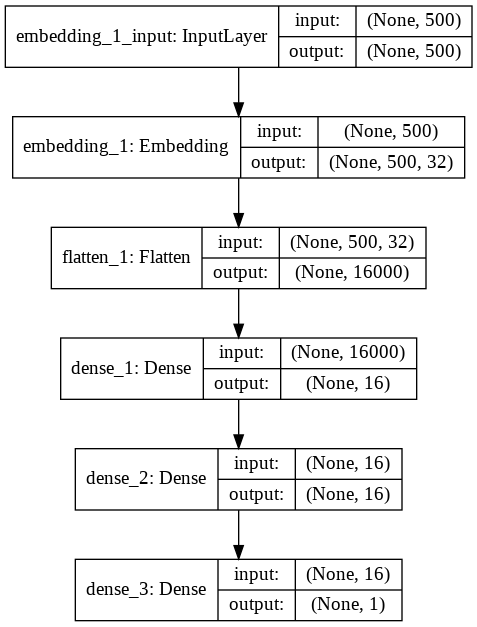

In [37]:
# Output network visualization
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
SVG(model_to_dot(model).create(prog='dot', format='svg'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

###3. With a batch size of 128 and 5 epochs, train the model

In [38]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)




Train on 25000 samples, validate on 25000 samples
Epoch 1/5





25000/25000 [==============================] - 8s 314us/step - loss: 0.5909 - acc: 0.6338 - val_loss: 0.3210 - val_acc: 0.8619
Epoch 2/5
25000/25000 [==============================] - 7s 269us/step - loss: 0.2157 - acc: 0.9154 - val_loss: 0.2836 - val_acc: 0.8813
Epoch 3/5
25000/25000 [==============================] - 7s 277us/step - loss: 0.0785 - acc: 0.9776 - val_loss: 0.3378 - val_acc: 0.8772
Epoch 4/5
25000/25000 [==============================] - 7s 281us/step - loss: 0.0190 - acc: 0.9958 - val_loss: 0.4331 - val_acc: 0.8707
Epoch 5/5
25000/25000 [==============================] - 7s 280us/step - loss: 0.0038 - acc: 0.9996 - val_loss: 0.4948 - val_acc: 0.8690


###4. Display results of training

[]

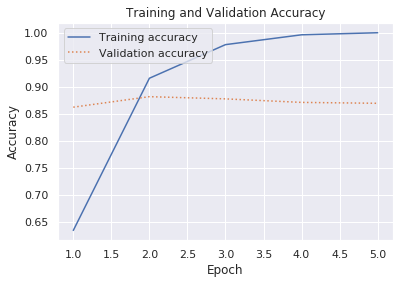

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['acc']
val = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

In [40]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 86.90%


###5. Build an analyzer function to apply this outside model to our Yelp data

In [0]:
#Build analyzer function based on the model to apply to the vegas dataset.
import string
import numpy as np

def analyzer(text):
    # Prepare the input by removing punctuation characters, converting
    # characters to lower case, and removing words containing numbers
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]

    # Generate an input tensor
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input], maxlen=max_review_length)

    # Invoke the model and return the result
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [42]:
vegas_part2 = vegas
vegas_part2.head()

,text,review_stars,highlow,clean_text,textblob_sentiment
0,"Like walking back in time, every Saturday morn...",4.0,1,like walking back in time every saturday morni...,0.061458
1,Glad we caught it before leaving the Vegas sta...,5.0,1,glad we caught it before leaving the vegas sta...,0.292857
2,This is a really quaint place for the whole fa...,4.0,1,this is a really quaint place for the whole fa...,0.177941
3,Yes! As good as it gets in way of pinball mach...,5.0,1,yes as good as it gets in way of pinball machi...,0.448889
4,My family and I have been to this show twice. ...,5.0,1,my family and i have been to this show twice b...,0.290747


In [43]:
vegas_part2["imdb_model_sentiment"] = vegas_part2['clean_text'].apply(lambda review: analyzer(review))
vegas_part2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,review_stars,highlow,clean_text,textblob_sentiment,imdb_model_sentiment
0,"Like walking back in time, every Saturday morn...",4.0,1,like walking back in time every saturday morni...,0.061458,0.971302
1,Glad we caught it before leaving the Vegas sta...,5.0,1,glad we caught it before leaving the vegas sta...,0.292857,0.999753
2,This is a really quaint place for the whole fa...,4.0,1,this is a really quaint place for the whole fa...,0.177941,0.999887
3,Yes! As good as it gets in way of pinball mach...,5.0,1,yes as good as it gets in way of pinball machi...,0.448889,0.998858
4,My family and I have been to this show twice. ...,5.0,1,my family and i have been to this show twice b...,0.290747,0.999762


###6. Visualize the new model's sentiment scores vs ratings

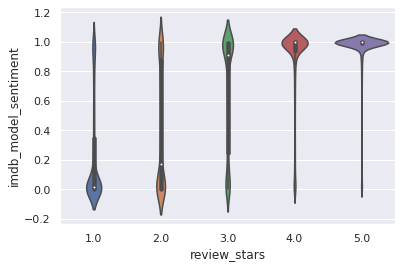

In [44]:
#As Violin Plot
ax_p2 = sns.violinplot(x="review_stars", y="imdb_model_sentiment", data=vegas_part2)

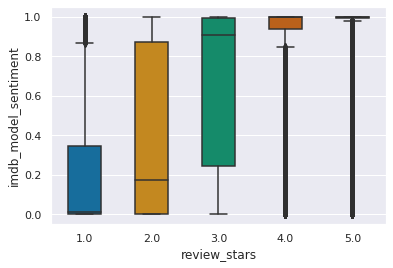

In [45]:
import seaborn as sns
# plot boxplot with seaborn
bplot=sns.boxplot(y='imdb_model_sentiment', x='review_stars', 
                 data=vegas_part2, 
                 width=0.5,
                 palette="colorblind")

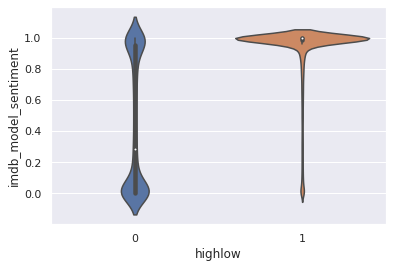

In [46]:
#As Violin Plot
ax2_p2 = sns.violinplot(x="highlow", y="imdb_model_sentiment", data=vegas_part2)

* As we can see, this model does a pretty good job at separating between classes based on sentiment in the text of the yelp reviews!



In [47]:
#check correlation
vegas_part2['review_stars'].corr(vegas['imdb_model_sentiment'])

0.6479252344873486

In [48]:
#check correlation
vegas_part2['highlow'].corr(vegas['imdb_model_sentiment'])

0.5958154924811183

* These are higher correlations than with the textblob package

###7. Test the model on some Yelp Reviews

In [49]:
positive_review_example = vegas_high.iloc[0]['clean_text']
positive_review_example

'im speechless cant describe how wonderful it is and how impressive ive got i will bring my family to watch the show   remember to register for tickets do research online before you pay'

In [50]:
analyzer(positive_review_example)

0.9985252

* A sentiment score of 0.986 is high, and this is correct as the contents of that review were positive!



In [51]:
negative_review_example = vegas_low.iloc[0]['clean_text']
negative_review_example

'show got canceled and the service was horrible about getting refund hoping i can get a refund tomorrow'

In [52]:
analyzer(negative_review_example)

0.08286244

* A sentiment score of 0.096 is low, and this is correct as the contents of that review were negative!

* From this I can conclude that it is in fact possible to leverage existing sentiment models, trained on other datasets for the task of analyzing sentiment in reviews. At least in an exploratory capacity, it seems that this technique is effective.



###8. Extra - Predictive ability check - Logistic Regression on High-Low Ratings

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [54]:
#get both sentiment values and see how well they can be used to predict a star rating:
#extratable = vegas_part2[["textblob_sentiment","imdb_model_sentiment"]] #test with both
extratable2 = vegas_part2[["imdb_model_sentiment"]] #test with just imdb
xr = extratable2.values
xr.shape

(37648, 1)

In [55]:
#get the highlow as class labels
yr = vegas_part2["highlow"]
yr.shape

(37648,)

In [56]:
from sklearn.model_selection import train_test_split
xr_train,xr_test,yr_train,yr_test=train_test_split(xr, yr, test_size=0.2, random_state=7)
print(xr_train.shape,xr_test.shape,yr_train.shape,yr_test.shape)

(30118, 1) (7530, 1) (30118,) (7530,)


In [57]:
#fit the data to the train set
logreg.fit(xr_train, yr_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
#make predictions on the test set
predictions = logreg.predict(xr_test)

In [59]:
# simple accuracy check
score = logreg.score(xr_test, yr_test)
print(score)

0.8424966799468792


*  This suggests that we can predict with about 83.8% accuracy whether the star rating of a review is high (4|5) or low (1|2|3) based on the text of the review. This suggests that the sentiment analysis using sequential model in keras on imdb data can effectively analyze sentiment in text. Sentiment can then serve as a reduced representation of the text data in model building. Importantly this can then be related back to the rating a customer left.



In [66]:
analyzer('This class is the worst')

0.014344539

In [67]:
analyzer('I love this class!')

0.942495